In [105]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [106]:
from model import simulate
import numpy as np
from analysis import filter_population, simulate_batch
import matplotlib.pyplot as plt
import matplotlib as mpl
from copy import deepcopy
from grab_data import get_matrix, get_population_sizes

mpl.rcParams['figure.dpi'] = 120

In [107]:
flow_matrix = get_matrix()
pop_sizes = get_population_sizes()
commuter_sizes = flow_matrix.sum(axis=1)
home_sizes = pop_sizes - commuter_sizes

In [108]:
sim = simulate(beta=2.5, psi=0.8, gamma=0.4, pop_sizes=pop_sizes, od_matrix=flow_matrix, model='random_oneway')

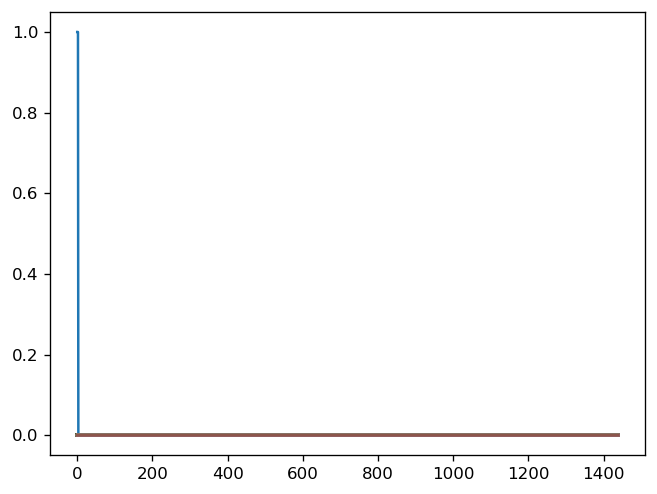

In [109]:
plt.plot(sim[1].sum(axis=2))
plt.show()

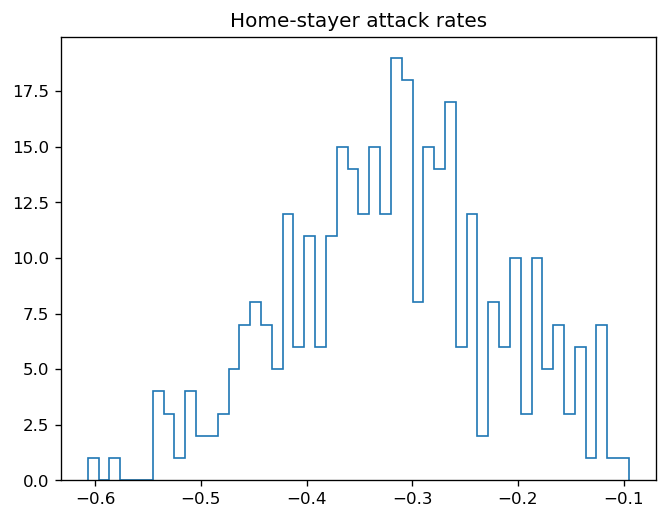

In [110]:
home_attack_rate = (home_sizes - sim[0][-1,:,:].diagonal())/home_sizes
plt.hist(home_attack_rate, bins=50,histtype='step')
plt.title('Home-stayer attack rates')
plt.show()

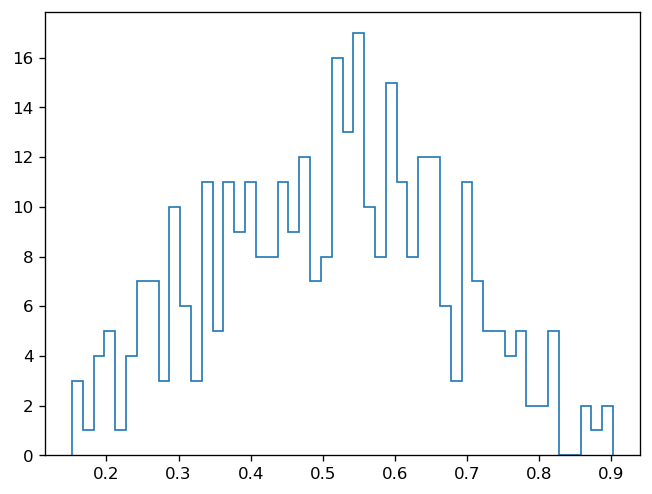

In [111]:
commuter_attack_rate = (commuter_sizes- (sim[0][-1,:,:].sum(axis=1) - sim[0][-1,:,:].diagonal()))/commuter_sizes
plt.hist(commuter_attack_rate, bins=50,histtype='step')
plt.show()

In [112]:
commuter_attack_rate.shape

(346,)

In [113]:
home_attack_rate.shape

(346,)

In [114]:
commuter_attack_rate

array([0.64851114, 0.55212623, 0.53405658, 0.60186518, 0.63948498,
       0.66385864, 0.63380246, 0.46924955, 0.62510889, 0.47610303,
       0.50801107, 0.66902667, 0.54267577, 0.59299768, 0.61789108,
       0.64741237, 0.64486013, 0.6072697 , 0.68433372, 0.827321  ,
       0.86568444, 0.78890574, 0.75818823, 0.76607366, 0.53449071,
       0.39156149, 0.53584102, 0.43154314, 0.7744396 , 0.54756954,
       0.61711451, 0.4346833 , 0.4040994 , 0.36736238, 0.48706632,
       0.45557014, 0.5978446 , 0.44356457, 0.60024417, 0.55891947,
       0.5244441 , 0.43126404, 0.48455813, 0.4748466 , 0.45107907,
       0.53480571, 0.34696174, 0.69995626, 0.47932198, 0.54203611,
       0.62716883, 0.75219399, 0.57615244, 0.8250392 , 0.76494773,
       0.74710269, 0.56612763, 0.59930846, 0.71228235, 0.66166459,
       0.65080999, 0.82211324, 0.40789548, 0.56963111, 0.71200043,
       0.55170535, 0.77994478, 0.70192417, 0.64527895, 0.63206107,
       0.78332753, 0.65219927, 0.69394923, 0.65680498, 0.53370